In [11]:
# Quick Start Guide for PointProcessModel

# Step 1: Import the Necessary Modules
import matplotlib.pyplot as plt
import os
import numpy as np

# Need the below if you haven't installed the package yet
#import sys
#sys.path.append('/Users/patrick_bloniasz/Documents/GitHub/filtered_point_process')


from filtered_point_process.PointProcess import PointProcessModel
from filtered_point_process.FPP import FilteredPointProcess

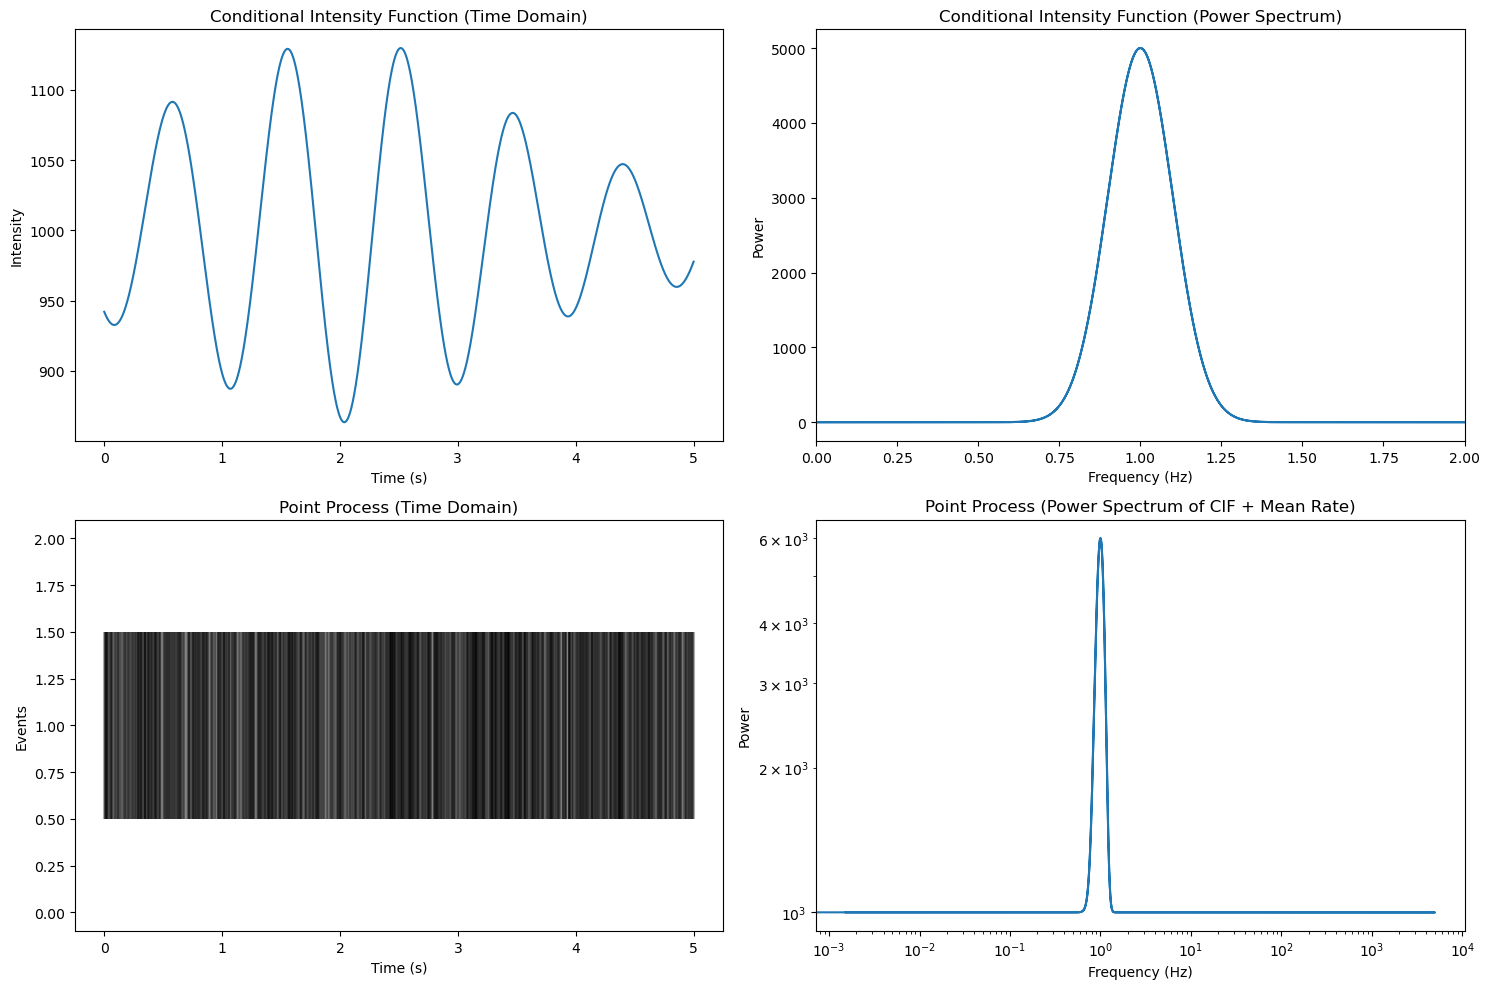

In [17]:
# Step 2: Define Parameters for the Model
params = {
    'method': 'gaussian',
    'peak_height': 5000,
    'center_frequency': 1,
    'peak_width': 0.1,
    'fs': 1/0.0001,
    'T': 5,
    'Nsims': 1,
    'lambda_0': [1000]
}

# Step 3: Initialize the Model
model = PointProcessModel(params=params, seed=45)

# Step 4: Simulate the CIF and Point Process
model.simulate_pp()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# CIF (Time Domain)
axs[0, 0].plot(model.cif_time_axis, model.cif_realization)
axs[0, 0].set_title("Conditional Intensity Function (Time Domain)")
axs[0, 0].set_xlabel("Time (s)")
axs[0, 0].set_ylabel("Intensity")
axs[0, 0].grid(False)

# CIF (Frequency Domain)
axs[0, 1].plot(model.cif_frequencies, model.cif_PSD)
axs[0, 1].set_title("Conditional Intensity Function (Power Spectrum)")
axs[0, 1].set_xlabel("Frequency (Hz)")
axs[0, 1].set_ylabel("Power")
axs[0, 1].grid(False)
axs[0, 1].set_xlim(0, 2)

# Point Process (Time Domain)
axs[1, 0].eventplot(model.pp_events, colors="black", alpha=0.08)
axs[1, 0].set_title("Point Process (Time Domain)")
axs[1, 0].set_xlabel("Time (s)")
axs[1, 0].set_ylabel("Events")
axs[1, 0].grid(False)

# Point Process (Frequency Domain)
axs[1, 1].loglog(model.pp_frequencies, model.pp_PSD)
axs[1, 1].set_title("Point Process (Power Spectrum of CIF + Mean Rate)")
axs[1, 1].set_xlabel("Frequency (Hz)")
axs[1, 1].set_ylabel("Power")
axs[1, 1].grid(False)

plt.tight_layout()
plt.show()
